# Coursera Capstone Project

### Analyzing Neighborhood Data London

##### November 2020

---

### Part 1  - Data Frame

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 9.0 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=9c7cdf0cec1443a98298303b8ec0f8384342de358458cc3d837523da0559a147
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


#### Load and Explore the Data

*Source:*

https://en.wikipedia.org/wiki/List_of_London_boroughs#List_of_boroughs_and_local_authorities

In [5]:
url='https://en.wikipedia.org/wiki/List_of_London_boroughs#List_of_boroughs_and_local_authorities'

In [6]:
df_list = pd.read_html(url)

In [7]:
df_list

[                            Borough     Inner Status  \
 0     Barking and Dagenham [note 1]       NaN    NaN   
 1                            Barnet       NaN    NaN   
 2                            Bexley       NaN    NaN   
 3                             Brent       NaN    NaN   
 4                           Bromley       NaN    NaN   
 5                            Camden       NaN    NaN   
 6                           Croydon       NaN    NaN   
 7                            Ealing       NaN    NaN   
 8                           Enfield       NaN    NaN   
 9                Greenwich [note 2]  [note 3]  Royal   
 10                          Hackney       NaN    NaN   
 11  Hammersmith and Fulham [note 4]       NaN    NaN   
 12                         Haringey  [note 3]    NaN   
 13                           Harrow       NaN    NaN   
 14                         Havering       NaN    NaN   
 15                       Hillingdon       NaN    NaN   
 16                         Hou

In [8]:
len(df_list)

4

In [9]:
df_list[0]

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [10]:
df_list[1]

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


*Source:*

https://en.wikipedia.org/wiki/List_of_London_boroughs#List_of_boroughs_and_local_authorities

*Explanation from this Wikipedia-site:*

This is a list of local authority districts within Greater London, including 32 London boroughs and the City of London. The London boroughs were all created on 1 April 1965. Upon creation, twelve were designated Inner London boroughs and the remaining twenty were designated Outer London boroughs. The Office for National Statistics has amended the designations of three boroughs for statistics purposes only. Three boroughs have been granted the designation royal borough and one has city status.

The City of London is the 33rd principal division of Greater London but it is not a London borough.

In [11]:
df0 = df_list[0]
df1 = df_list[1]

In [12]:
df2 = df0.append(df1, ignore_index=True, sort=False)

In [13]:
df2.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25.0,NaN,NaN
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31.0,NaN,NaN
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23.0,NaN,NaN
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12.0,NaN,NaN
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20.0,NaN,NaN


In [14]:
df2.dtypes

Borough                      object
Inner                        object
Status                       object
Local authority              object
Political control            object
Headquarters                 object
Area (sq mi)                float64
Population (2013 est)[1]    float64
Co-ordinates                 object
Nr. in map                  float64
Population(2011 est)        float64
Nr. inmap                   float64
dtype: object

In [15]:
df2.columns

Index(['Borough', 'Inner', 'Status', 'Local authority', 'Political control',
       'Headquarters', 'Area (sq mi)', 'Population (2013 est)[1]',
       'Co-ordinates', 'Nr. in map', 'Population(2011 est)', 'Nr. inmap'],
      dtype='object')

## Data Cleaning

##### Drop unneccesary variables

In [16]:
df3 = df2.drop(['Local authority', 'Headquarters', 'Nr. inmap', 'Nr. in map'], axis=1)

In [17]:
df3.head()

,Borough,Inner,Status,Political control,Area (sq mi),Population (2013 est)[1],Co-ordinates,Population(2011 est)
0,Barking and Dagenham [note 1],NaN,NaN,Labour,13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,NaN
1,Barnet,NaN,NaN,Conservative,33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,NaN
2,Bexley,NaN,NaN,Conservative,23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,NaN
3,Brent,NaN,NaN,Labour,16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,NaN
4,Bromley,NaN,NaN,Conservative,57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,NaN


In [18]:
df3[df3['Borough'] == 'City of London']['Population (2013 est)[1]']

32   NaN
Name: Population (2013 est)[1], dtype: float64

In [19]:
df3.loc[32][5]

nan

In [20]:
df3.isna().any()

Borough                     False
Inner                        True
Status                       True
Political control           False
Area (sq mi)                False
Population (2013 est)[1]     True
Co-ordinates                False
Population(2011 est)         True
dtype: bool

In [21]:
df3.isna().sum()

Borough                      0
Inner                       29
Status                      28
Political control            0
Area (sq mi)                 0
Population (2013 est)[1]     1
Co-ordinates                 0
Population(2011 est)        32
dtype: int64

In [22]:
pop_32_2011=df3.loc[32][7]

In [23]:
pop_32_2011

7000.0

In [24]:
df3['Population (2013 est)[1]'].fillna(pop_32_2011, inplace=True) 

In [25]:
df3.tail()

,Borough,Inner,Status,Political control,Area (sq mi),Population (2013 est)[1],Co-ordinates,Population(2011 est)
28,Tower Hamlets,NaN,NaN,Labour,7.63,272890.0,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,NaN
29,Waltham Forest,NaN,NaN,Labour,14.99,265797.0,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,NaN
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,NaN
31,Westminster,NaN,City,Conservative,8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,NaN
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,7000.0


In [26]:
df3.drop('Population(2011 est)', axis=1, inplace=True)

In [27]:
df4 = df3.rename(columns={'Area (sq mi)':'Area_sq_mi',
                          'Population (2013 est)[1]':'Population',
                          'Political control':'pc'}, 
                 )

In [28]:
df4.loc[df4['Borough'].str.endswith("]")]

,Borough,Inner,Status,pc,Area_sq_mi,Population,Co-ordinates
0,Barking and Dagenham [note 1],NaN,NaN,Labour,13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
9,Greenwich [note 2],[note 3],Royal,Labour,18.28,264008.0,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E
11,Hammersmith and Fulham [note 4],NaN,NaN,Labour,6.33,178685.0,51°29′34″N 0°14′02″W﻿ / ﻿51.4927°N 0.2339°W


In [29]:
df4['Borough'].str.endswith("]");

In [30]:
df4.loc[0][0][:-9]

'Barking and Dagenham'

In [31]:
df4.loc[0][0]

'Barking and Dagenham [note 1]'

In [32]:
df4.iloc[[0, 9, 11], [0]]

,Borough
0,Barking and Dagenham [note 1]
9,Greenwich [note 2]
11,Hammersmith and Fulham [note 4]


In [33]:
df4.loc[df4.Borough == 'Barking and Dagenham [note 1]', 'Borough']

0    Barking and Dagenham [note 1]
Name: Borough, dtype: object

In [34]:
df4.loc[df4.Borough == 'Barking and Dagenham [note 1]']

,Borough,Inner,Status,pc,Area_sq_mi,Population,Co-ordinates
0,Barking and Dagenham [note 1],NaN,NaN,Labour,13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E


In [35]:
df4.loc[df4.Borough == 'Barking and Dagenham [note 1]', 'Borough'] = df4.loc[0][0][:-9]

In [36]:
df4.loc[df4.Borough == 'Barking and Dagenham']['Borough']

0    Barking and Dagenham
Name: Borough, dtype: object

In [37]:
df4.loc[9][0]

'Greenwich [note 2]'

In [38]:
df4.loc[9][0][:-9]

'Greenwich'

In [39]:
df4.loc[df4.Borough == 'Greenwich [note 2]', 'Borough'] = df4.loc[9][0][:-9]

In [40]:
df4.loc[df4.Borough == 'Hammersmith and Fulham [note 4]', 'Borough'] = df4.loc[11][0][:-9]

In [41]:
df4.iloc[[0, 9, 11], [0]]

,Borough
0,Barking and Dagenham
9,Greenwich
11,Hammersmith and Fulham


In [42]:
df4.head(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,Co-ordinates
0,Barking and Dagenham,NaN,NaN,Labour,13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,NaN,NaN,Conservative,33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,NaN,NaN,Conservative,23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E


In [43]:
df4.tail(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,Co-ordinates
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W
31,Westminster,NaN,City,Conservative,8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W


In [44]:
address = 'City of London, London'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
print('The geograpical coordinates of City of London are {}, {}.'.format(latitude, longitude))

51.5156177 -0.0919983
The geograpical coordinates of City of London are 51.5156177, -0.0919983.


In [45]:
df4[['First','Last']] = df4['Co-ordinates'].str.split("/",expand=True,)

In [46]:
df4.tail(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,Co-ordinates,First,Last
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,51°27′24″N 0°11′28″W﻿,﻿51.4567°N 0.1910°W
31,Westminster,NaN,City,Conservative,8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,51°29′50″N 0°08′14″W﻿,﻿51.4973°N 0.1372°W
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,51°30′56″N 0°05′32″W﻿,﻿51.5155°N 0.0922°W


In [47]:
df5=df4.drop(['Co-ordinates', 'First'], axis=1)

In [48]:
df5.tail(2)

,Borough,Inner,Status,pc,Area_sq_mi,Population,Last
31,Westminster,NaN,City,Conservative,8.29,226841.0,﻿51.4973°N 0.1372°W
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,﻿51.5155°N 0.0922°W


In [49]:
df5[['latitude', 'longitude_long']]=df5.Last.str.split("°N ", expand=True)

In [50]:
df5.tail(2)

,Borough,Inner,Status,pc,Area_sq_mi,Population,Last,latitude,longitude_long
31,Westminster,NaN,City,Conservative,8.29,226841.0,﻿51.4973°N 0.1372°W,﻿51.4973,0.1372°W
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,﻿51.5155°N 0.0922°W,﻿51.5155,0.0922°W


In [51]:
df5[['longitude_abs', 'ew_long']]=df5.longitude_long.str.split("°", expand=True)

In [52]:
df5.tail(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,Last,latitude,longitude_long,longitude_abs,ew_long
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,﻿51.4567°N 0.1910°W,﻿51.4567,0.1910°W,0.1910,W
31,Westminster,NaN,City,Conservative,8.29,226841.0,﻿51.4973°N 0.1372°W,﻿51.4973,0.1372°W,0.1372,W
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,﻿51.5155°N 0.0922°W,﻿51.5155,0.0922°W,0.0922,W


In [53]:
df6 = df5.drop(['Last', 'longitude_long'], axis=1)

In [54]:
df6.tail(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,﻿51.4567,0.1910,W
31,Westminster,NaN,City,Conservative,8.29,226841.0,﻿51.4973,0.1372,W
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,﻿51.5155,0.0922,W


In [55]:
df6['latitude'] = df6['latitude'].str.strip()

In [56]:
df6['longitude_abs'] = df6['longitude_abs'].str.strip()

In [57]:
df6.dtypes

Borough           object
Inner             object
Status            object
pc                object
Area_sq_mi       float64
Population       float64
latitude          object
longitude_abs     object
ew_long           object
dtype: object

##### u'\ufeff' in Python string

workaround is necessary

In [58]:
df6['latitude'][:10]

0    ﻿51.5607
1    ﻿51.6252
2    ﻿51.4549
3    ﻿51.5588
4    ﻿51.4039
5    ﻿51.5290
6    ﻿51.3714
7    ﻿51.5130
8    ﻿51.6538
9    ﻿51.4892
Name: latitude, dtype: object

In [59]:
df6[['lat1', 'lat2']]=df6.latitude.str.split(".", expand=True)

In [60]:
df6.tail()

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2
28,Tower Hamlets,NaN,NaN,Labour,7.63,272890.0,﻿51.5099,0.0059,W,﻿51,5099
29,Waltham Forest,NaN,NaN,Labour,14.99,265797.0,﻿51.5908,0.0134,W,﻿51,5908
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,﻿51.4567,0.1910,W,﻿51,4567
31,Westminster,NaN,City,Conservative,8.29,226841.0,﻿51.4973,0.1372,W,﻿51,4973
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,﻿51.5155,0.0922,W,﻿51,5155


In [61]:
df6['lat2'].astype(float)

0     5607.0
1     6252.0
2     4549.0
3     5588.0
4     4039.0
5     5290.0
6     3714.0
7     5130.0
8     6538.0
9     4892.0
10    5450.0
11    4927.0
12    6000.0
13    5898.0
14    5812.0
15    5441.0
16    4746.0
17    5416.0
18    5020.0
19    4085.0
20    4607.0
21    4452.0
22    4014.0
23    5077.0
24    5590.0
25    4479.0
26    5035.0
27    3618.0
28    5099.0
29    5908.0
30    4567.0
31    4973.0
32    5155.0
Name: lat2, dtype: float64

In [62]:
df6.dtypes

Borough           object
Inner             object
Status            object
pc                object
Area_sq_mi       float64
Population       float64
latitude          object
longitude_abs     object
ew_long           object
lat1              object
lat2              object
dtype: object

In [63]:
df6['lat3']=df6['lat2'].astype(float)

In [64]:
df6.dtypes

Borough           object
Inner             object
Status            object
pc                object
Area_sq_mi       float64
Population       float64
latitude          object
longitude_abs     object
ew_long           object
lat1              object
lat2              object
lat3             float64
dtype: object

In [65]:
df6['lat4']=df6['lat3']/10000

In [66]:
df6.tail()

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2,lat3,lat4
28,Tower Hamlets,NaN,NaN,Labour,7.63,272890.0,﻿51.5099,0.0059,W,﻿51,5099,5099.0,0.5099
29,Waltham Forest,NaN,NaN,Labour,14.99,265797.0,﻿51.5908,0.0134,W,﻿51,5908,5908.0,0.5908
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,﻿51.4567,0.1910,W,﻿51,4567,4567.0,0.4567
31,Westminster,NaN,City,Conservative,8.29,226841.0,﻿51.4973,0.1372,W,﻿51,4973,4973.0,0.4973
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,﻿51.5155,0.0922,W,﻿51,5155,5155.0,0.5155


In [67]:
df6['lat5']=df6['lat4']+51

In [68]:
df6.tail()

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2,lat3,lat4,lat5
28,Tower Hamlets,NaN,NaN,Labour,7.63,272890.0,﻿51.5099,0.0059,W,﻿51,5099,5099.0,0.5099,51.5099
29,Waltham Forest,NaN,NaN,Labour,14.99,265797.0,﻿51.5908,0.0134,W,﻿51,5908,5908.0,0.5908,51.5908
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,﻿51.4567,0.1910,W,﻿51,4567,4567.0,0.4567,51.4567
31,Westminster,NaN,City,Conservative,8.29,226841.0,﻿51.4973,0.1372,W,﻿51,4973,4973.0,0.4973,51.4973
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,﻿51.5155,0.0922,W,﻿51,5155,5155.0,0.5155,51.5155


In [69]:
df6.dtypes

Borough           object
Inner             object
Status            object
pc                object
Area_sq_mi       float64
Population       float64
latitude          object
longitude_abs     object
ew_long           object
lat1              object
lat2              object
lat3             float64
lat4             float64
lat5             float64
dtype: object

In [70]:
df6['long1_abs']=df6['longitude_abs'].astype(float)

In [71]:
df6.dtypes

Borough           object
Inner             object
Status            object
pc                object
Area_sq_mi       float64
Population       float64
latitude          object
longitude_abs     object
ew_long           object
lat1              object
lat2              object
lat3             float64
lat4             float64
lat5             float64
long1_abs        float64
dtype: object

In [72]:
df6['long2'] = -(df6['long1_abs']) 

In [73]:
df6.tail()

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2,lat3,lat4,lat5,long1_abs,long2
28,Tower Hamlets,NaN,NaN,Labour,7.63,272890.0,﻿51.5099,0.0059,W,﻿51,5099,5099.0,0.5099,51.5099,0.0059,-0.0059
29,Waltham Forest,NaN,NaN,Labour,14.99,265797.0,﻿51.5908,0.0134,W,﻿51,5908,5908.0,0.5908,51.5908,0.0134,-0.0134
30,Wandsworth,NaN,NaN,Conservative,13.23,310516.0,﻿51.4567,0.1910,W,﻿51,4567,4567.0,0.4567,51.4567,0.1910,-0.1910
31,Westminster,NaN,City,Conservative,8.29,226841.0,﻿51.4973,0.1372,W,﻿51,4973,4973.0,0.4973,51.4973,0.1372,-0.1372
32,City of London,([note 5],Sui generis;City;Ceremonial county,?,1.12,7000.0,﻿51.5155,0.0922,W,﻿51,5155,5155.0,0.5155,51.5155,0.0922,-0.0922


In [74]:
pd.get_dummies(df6['ew_long'], prefix=None).head()

,E,W
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [75]:
df_ew=pd.get_dummies(df6['ew_long'], prefix=None)

## Political Control

In [76]:
df6['pc'].unique()

array(['Labour', 'Conservative', 'Conservative (council NOC)',
       'Liberal\xa0Democrat', '?'], dtype=object)

In [77]:
df6.loc[14]

Borough                            Havering
Inner                                   NaN
Status                                  NaN
pc               Conservative (council NOC)
Area_sq_mi                            43.35
Population                           242080
latitude                           ﻿51.5812
longitude_abs                        0.1837
ew_long                                   E
lat1                                    ﻿51
lat2                                   5812
lat3                                   5812
lat4                                 0.5812
lat5                                51.5812
long1_abs                            0.1837
long2                               -0.1837
Name: 14, dtype: object

In [78]:
df6.loc[14][3]

'Conservative (council NOC)'

In [79]:
df6.loc[14][3][:-14]

'Conservative'

In [80]:
df6.loc[df6.Borough == 'Havering', 'pc']

14    Conservative (council NOC)
Name: pc, dtype: object

In [81]:
df6.loc[df6.Borough == 'Havering', 'pc'] = df6.loc[14][3][:-14]

In [82]:
df6.loc[14][3]

'Conservative'

In [83]:
df6.loc[32][3]

'?'

In [84]:
# Setting the new value
df6.loc[df6.Borough == 'City of London', 'pc'] = 'Unknown'

In [85]:
df6.loc[32][3]

'Unknown'

In [86]:
df6['pc'].value_counts()

Labour              21
Conservative         8
Liberal Democrat     3
Unknown              1
Name: pc, dtype: int64

###### separate df_pc

In [87]:
pd.get_dummies(df6['pc'], prefix='pc');

In [88]:
df_pc=pd.get_dummies(df6['pc'], prefix='pc')

In [89]:
df_pc.head(3)

,pc_Conservative,pc_Labour,pc_Liberal Democrat,pc_Unknown
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0


In [90]:
df_pc;

## Inner

In [91]:
inner = 0

In [92]:
df6['Inner'] = inner

In [93]:
df6.head(6)

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2,lat3,lat4,lat5,long1_abs,long2
0,Barking and Dagenham,0,NaN,Labour,13.93,194352.0,﻿51.5607,0.1557,E,﻿51,5607,5607.0,0.5607,51.5607,0.1557,-0.1557
1,Barnet,0,NaN,Conservative,33.49,369088.0,﻿51.6252,0.1517,W,﻿51,6252,6252.0,0.6252,51.6252,0.1517,-0.1517
2,Bexley,0,NaN,Conservative,23.38,236687.0,﻿51.4549,0.1505,E,﻿51,4549,4549.0,0.4549,51.4549,0.1505,-0.1505
3,Brent,0,NaN,Labour,16.70,317264.0,﻿51.5588,0.2817,W,﻿51,5588,5588.0,0.5588,51.5588,0.2817,-0.2817
4,Bromley,0,NaN,Conservative,57.97,317899.0,﻿51.4039,0.0198,E,﻿51,4039,4039.0,0.4039,51.4039,0.0198,-0.0198
5,Camden,0,NaN,Labour,8.40,229719.0,﻿51.5290,0.1255,W,﻿51,5290,5290.0,0.5290,51.5290,0.1255,-0.1255


Based on Wikipedia (not visible when scraping the site). Some rows are marked with a green sign, indicating this Borough belongs to Inner London.

In [94]:
inner_nw=1

In [95]:
df6.Borough.to_list()

['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster',
 'City of London']

In [96]:
# Setting the new value
df6.loc[df6.Borough == 'Camden', 'Inner'] = inner_nw

In [97]:
df6.loc[df6.Borough == 'Greenwich', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Hackney', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Hammersmith and Fulham', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Islington', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Kensington and Chelsea', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Lambeth', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Lewisham', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Southwark', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Tower Hamlets', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Wandsworth', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'Westminster', 'Inner'] = inner_nw
df6.loc[df6.Borough == 'City of London', 'Inner'] = inner_nw

In [98]:
df6.Inner.dtypes

dtype('int64')

In [99]:
df6['Inner'].value_counts()

0    20
1    13
Name: Inner, dtype: int64

## Status

In [100]:
df6['Status'].fillna('Nothing', inplace=True) 

In [101]:
df6.loc[32]

Borough                              City of London
Inner                                             1
Status           Sui generis;City;Ceremonial county
pc                                          Unknown
Area_sq_mi                                     1.12
Population                                     7000
latitude                                   ﻿51.5155
longitude_abs                                0.0922
ew_long                                           W
lat1                                            ﻿51
lat2                                           5155
lat3                                           5155
lat4                                         0.5155
lat5                                        51.5155
long1_abs                                    0.0922
long2                                       -0.0922
Name: 32, dtype: object

In [102]:
df6.loc[32][2]

'Sui generis;City;Ceremonial county'

In [103]:
df6.loc[32][2][12:16]

'City'

In [104]:
# Setting the new value
df6.loc[df6.Borough == 'City of London', 'Status'] = df6.loc[32][2][12:16]

###### separate df_status

In [105]:
pd.get_dummies(df6['Status'], prefix='status');

In [106]:
df_status=pd.get_dummies(df6['Status'], prefix='status')

In [107]:
df_status.head(3)

,status_City,status_Nothing,status_Royal
0,0,1,0
1,0,1,0
2,0,1,0


In [108]:
df6['Status'].value_counts()

Nothing    28
Royal       3
City        2
Name: Status, dtype: int64

## Preliminary DataFile

In [109]:
# Taking a look at the result
df6.head(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2,lat3,lat4,lat5,long1_abs,long2
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,﻿51.5607,0.1557,E,﻿51,5607,5607.0,0.5607,51.5607,0.1557,-0.1557
1,Barnet,0,Nothing,Conservative,33.49,369088.0,﻿51.6252,0.1517,W,﻿51,6252,6252.0,0.6252,51.6252,0.1517,-0.1517
2,Bexley,0,Nothing,Conservative,23.38,236687.0,﻿51.4549,0.1505,E,﻿51,4549,4549.0,0.4549,51.4549,0.1505,-0.1505


In [110]:
df7 = df6.merge(df_ew, left_index=True, right_index=True)

In [111]:
df7.tail()

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2,lat3,lat4,lat5,long1_abs,long2,E,W
28,Tower Hamlets,1,Nothing,Labour,7.63,272890.0,﻿51.5099,0.0059,W,﻿51,5099,5099.0,0.5099,51.5099,0.0059,-0.0059,0,1
29,Waltham Forest,0,Nothing,Labour,14.99,265797.0,﻿51.5908,0.0134,W,﻿51,5908,5908.0,0.5908,51.5908,0.0134,-0.0134,0,1
30,Wandsworth,1,Nothing,Conservative,13.23,310516.0,﻿51.4567,0.1910,W,﻿51,4567,4567.0,0.4567,51.4567,0.1910,-0.1910,0,1
31,Westminster,1,City,Conservative,8.29,226841.0,﻿51.4973,0.1372,W,﻿51,4973,4973.0,0.4973,51.4973,0.1372,-0.1372,0,1
32,City of London,1,City,Unknown,1.12,7000.0,﻿51.5155,0.0922,W,﻿51,5155,5155.0,0.5155,51.5155,0.0922,-0.0922,0,1


In [112]:
df7;

In [113]:
df7['long3'] = np.where(df7['W']==1, df7['long2'], df7['long1_abs'])

In [114]:
df7.head()

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2,lat3,lat4,lat5,long1_abs,long2,E,W,long3
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,﻿51.5607,0.1557,E,﻿51,5607,5607.0,0.5607,51.5607,0.1557,-0.1557,1,0,0.1557
1,Barnet,0,Nothing,Conservative,33.49,369088.0,﻿51.6252,0.1517,W,﻿51,6252,6252.0,0.6252,51.6252,0.1517,-0.1517,0,1,-0.1517
2,Bexley,0,Nothing,Conservative,23.38,236687.0,﻿51.4549,0.1505,E,﻿51,4549,4549.0,0.4549,51.4549,0.1505,-0.1505,1,0,0.1505
3,Brent,0,Nothing,Labour,16.70,317264.0,﻿51.5588,0.2817,W,﻿51,5588,5588.0,0.5588,51.5588,0.2817,-0.2817,0,1,-0.2817
4,Bromley,0,Nothing,Conservative,57.97,317899.0,﻿51.4039,0.0198,E,﻿51,4039,4039.0,0.4039,51.4039,0.0198,-0.0198,1,0,0.0198


In [115]:
df7[df7['W']==1];

Clean up unnecessary columns

In [116]:
df7.columns

Index(['Borough', 'Inner', 'Status', 'pc', 'Area_sq_mi', 'Population',
       'latitude', 'longitude_abs', 'ew_long', 'lat1', 'lat2', 'lat3', 'lat4',
       'lat5', 'long1_abs', 'long2', 'E', 'W', 'long3'],
      dtype='object')

## Merging Separate Dummy files

* Status:            `df_status`
* Political Control: `df_pc` 
* East/West:         `df_ew` *(already merged for latitude/longitude)*

In [117]:
df_status.head(3)

,status_City,status_Nothing,status_Royal
0,0,1,0
1,0,1,0
2,0,1,0


In [118]:
df_pc.head(3)

,pc_Conservative,pc_Labour,pc_Liberal Democrat,pc_Unknown
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0


In [119]:
df_status.merge(df_pc, left_index=True, right_index=True).head(3)

,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal Democrat,pc_Unknown
0,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0


In [120]:
df_spc = df_status.merge(df_pc, left_index=True, right_index=True)

In [121]:
df_spc.head(3)

,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal Democrat,pc_Unknown
0,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0


## Merge Preliminary and Dummy

In [122]:
df7.head(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,lat2,lat3,lat4,lat5,long1_abs,long2,E,W,long3
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,﻿51.5607,0.1557,E,﻿51,5607,5607.0,0.5607,51.5607,0.1557,-0.1557,1,0,0.1557
1,Barnet,0,Nothing,Conservative,33.49,369088.0,﻿51.6252,0.1517,W,﻿51,6252,6252.0,0.6252,51.6252,0.1517,-0.1517,0,1,-0.1517
2,Bexley,0,Nothing,Conservative,23.38,236687.0,﻿51.4549,0.1505,E,﻿51,4549,4549.0,0.4549,51.4549,0.1505,-0.1505,1,0,0.1505


In [123]:
df7b = df7.merge(df_spc, left_index=True, right_index=True)

In [124]:
df7b.tail(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,latitude,longitude_abs,ew_long,lat1,...,E,W,long3,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal Democrat,pc_Unknown
30,Wandsworth,1,Nothing,Conservative,13.23,310516.0,﻿51.4567,0.1910,W,﻿51,...,0,1,-0.1910,0,1,0,1,0,0,0
31,Westminster,1,City,Conservative,8.29,226841.0,﻿51.4973,0.1372,W,﻿51,...,0,1,-0.1372,1,0,0,1,0,0,0
32,City of London,1,City,Unknown,1.12,7000.0,﻿51.5155,0.0922,W,﻿51,...,0,1,-0.0922,1,0,0,0,0,0,1


In [125]:
df8 = df7b.drop(['latitude', 'longitude_abs', 'lat1', 'lat2', 'lat3', 'lat4', 'long1_abs', 'long2'], axis=1)

In [126]:
df8.tail()

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,lat5,E,W,long3,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal Democrat,pc_Unknown
28,Tower Hamlets,1,Nothing,Labour,7.63,272890.0,W,51.5099,0,1,-0.0059,0,1,0,0,1,0,0
29,Waltham Forest,0,Nothing,Labour,14.99,265797.0,W,51.5908,0,1,-0.0134,0,1,0,0,1,0,0
30,Wandsworth,1,Nothing,Conservative,13.23,310516.0,W,51.4567,0,1,-0.1910,0,1,0,1,0,0,0
31,Westminster,1,City,Conservative,8.29,226841.0,W,51.4973,0,1,-0.1372,1,0,0,1,0,0,0
32,City of London,1,City,Unknown,1.12,7000.0,W,51.5155,0,1,-0.0922,1,0,0,0,0,0,1


In [127]:
df8.rename(columns={'lat5':'latitude', 'long3':'longitude'}, inplace=True)

# First Exploration of DataFrame

In [128]:
df8

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal Democrat,pc_Unknown
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,E,51.5607,1,0,0.1557,0,1,0,0,1,0,0
1,Barnet,0,Nothing,Conservative,33.49,369088.0,W,51.6252,0,1,-0.1517,0,1,0,1,0,0,0
2,Bexley,0,Nothing,Conservative,23.38,236687.0,E,51.4549,1,0,0.1505,0,1,0,1,0,0,0
3,Brent,0,Nothing,Labour,16.70,317264.0,W,51.5588,0,1,-0.2817,0,1,0,0,1,0,0
4,Bromley,0,Nothing,Conservative,57.97,317899.0,E,51.4039,1,0,0.0198,0,1,0,1,0,0,0
5,Camden,1,Nothing,Labour,8.40,229719.0,W,51.5290,0,1,-0.1255,0,1,0,0,1,0,0
6,Croydon,0,Nothing,Labour,33.41,372752.0,W,51.3714,0,1,-0.0977,0,1,0,0,1,0,0
7,Ealing,0,Nothing,Labour,21.44,342494.0,W,51.5130,0,1,-0.3089,0,1,0,0,1,0,0
8,Enfield,0,Nothing,Labour,31.74,320524.0,W,51.6538,0,1,-0.0799,0,1,0,0,1,0,0
9,Greenwich,1,Royal,Labour,18.28,264008.0,E,51.4892,1,0,0.0648,0,0,1,0,1,0,0


In [129]:
df8.shape

(33, 18)

In [130]:
df8.columns

Index(['Borough', 'Inner', 'Status', 'pc', 'Area_sq_mi', 'Population',
       'ew_long', 'latitude', 'E', 'W', 'longitude', 'status_City',
       'status_Nothing', 'status_Royal', 'pc_Conservative', 'pc_Labour',
       'pc_Liberal Democrat', 'pc_Unknown'],
      dtype='object')

In [131]:
df8.dtypes

Borough                 object
Inner                    int64
Status                  object
pc                      object
Area_sq_mi             float64
Population             float64
ew_long                 object
latitude               float64
E                        uint8
W                        uint8
longitude              float64
status_City              uint8
status_Nothing           uint8
status_Royal             uint8
pc_Conservative          uint8
pc_Labour                uint8
pc_Liberal Democrat      uint8
pc_Unknown               uint8
dtype: object

In [132]:
df8.describe()

,Inner,Area_sq_mi,Population,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal Democrat,pc_Unknown
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.393939,18.408485,255026.878788,51.505964,0.212121,0.787879,-0.118379,0.060606,0.848485,0.090909,0.242424,0.636364,0.090909,0.030303
std,0.496198,12.645367,71891.280393,0.071538,0.415149,0.415149,0.159424,0.242306,0.364110,0.291937,0.435194,0.488504,0.291937,0.174078
min,0.000000,1.120000,7000.000000,51.361800,0.000000,0.000000,-0.476000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.360000,215667.000000,51.456700,0.000000,1.000000,-0.195800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.520000,263386.000000,51.507700,0.000000,1.000000,-0.111900,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,21.780000,310516.000000,51.558800,0.000000,1.000000,-0.013400,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,57.970000,372752.000000,51.653800,1.000000,1.000000,0.183700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
df8['Inner'].value_counts()

0    20
1    13
Name: Inner, dtype: int64

In [134]:
df8['ew_long'].value_counts()

W    26
E     7
Name: ew_long, dtype: int64

In [135]:
df8['pc'].value_counts()

Labour              21
Conservative         8
Liberal Democrat     3
Unknown              1
Name: pc, dtype: int64

In [136]:
df8['Status'].value_counts()

Nothing    28
Royal       3
City        2
Name: Status, dtype: int64

### Liberal Democrat

Apparently this columns cannot be dropped in `df8_short`, due to unrecognizable name. **KeyError: "['pc_Liberal Democrat'] not found in axis**

Earlier there was something strange with this name: `Liberal\xa0Democrat`, due to the space

In [137]:
#KeyError: "['pc_Liberal Democrat'] not found in axis"

In [138]:
#Liberal\xa0Democrat

In [139]:
df8.rename(columns={'pc_Liberal\xa0Democrat':'pc_Liberal_Democrat'}, inplace=True)

In [140]:
df8.head(3)

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,E,51.5607,1,0,0.1557,0,1,0,0,1,0,0
1,Barnet,0,Nothing,Conservative,33.49,369088.0,W,51.6252,0,1,-0.1517,0,1,0,1,0,0,0
2,Bexley,0,Nothing,Conservative,23.38,236687.0,E,51.4549,1,0,0.1505,0,1,0,1,0,0,0


In [141]:
df8_short = df8.drop(['Inner', 'Status', 'pc', 'Area_sq_mi', 'Population', 'ew_long', 'E', 'W', 'status_City',
       'status_Nothing', 'status_Royal', 'pc_Conservative', 'pc_Labour',
       'pc_Liberal_Democrat', 'pc_Unknown'], axis=1)

In [142]:
df8_short.head()

,Borough,latitude,longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [143]:
df8.head()

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,E,51.5607,1,0,0.1557,0,1,0,0,1,0,0
1,Barnet,0,Nothing,Conservative,33.49,369088.0,W,51.6252,0,1,-0.1517,0,1,0,1,0,0,0
2,Bexley,0,Nothing,Conservative,23.38,236687.0,E,51.4549,1,0,0.1505,0,1,0,1,0,0,0
3,Brent,0,Nothing,Labour,16.70,317264.0,W,51.5588,0,1,-0.2817,0,1,0,0,1,0,0
4,Bromley,0,Nothing,Conservative,57.97,317899.0,E,51.4039,1,0,0.0198,0,1,0,1,0,0,0


In [144]:
df8['pop_sq_mi'] = df8['Population']/df8['Area_sq_mi']

In [145]:
df8.head()

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown,pop_sq_mi
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,E,51.5607,1,0,0.1557,0,1,0,0,1,0,0,13952.045944
1,Barnet,0,Nothing,Conservative,33.49,369088.0,W,51.6252,0,1,-0.1517,0,1,0,1,0,0,0,11020.842042
2,Bexley,0,Nothing,Conservative,23.38,236687.0,E,51.4549,1,0,0.1505,0,1,0,1,0,0,0,10123.481608
3,Brent,0,Nothing,Labour,16.70,317264.0,W,51.5588,0,1,-0.2817,0,1,0,0,1,0,0,18997.844311
4,Bromley,0,Nothing,Conservative,57.97,317899.0,E,51.4039,1,0,0.0198,0,1,0,1,0,0,0,5483.853717


In [146]:
df8_sort = df8.sort_values(by=['pop_sq_mi'], ascending=False)

In [147]:
df8_sort[['Borough', 'pop_sq_mi', 'Area_sq_mi', 'Population']]

,Borough,pop_sq_mi,Area_sq_mi,Population
17,Islington,37572.648084,5.74,215667.0
28,Tower Hamlets,35765.399738,7.63,272890.0
10,Hackney,34969.972826,7.36,257379.0
18,Kensington and Chelsea,33246.581197,4.68,155594.0
20,Lambeth,30332.239382,10.36,314242.0
11,Hammersmith and Fulham,28228.278041,6.33,178685.0
31,Westminster,27363.208685,8.29,226841.0
5,Camden,27347.500000,8.40,229719.0
26,Southwark,26792.100539,11.14,298464.0
30,Wandsworth,23470.597128,13.23,310516.0


In [148]:
df8_sort2 = df8.sort_values(by=['Population'], ascending=False)

In [149]:
df8_sort2[['Borough', 'Population']].head(10)

,Borough,Population
6,Croydon,372752.0
1,Barnet,369088.0
7,Ealing,342494.0
8,Enfield,320524.0
23,Newham,318227.0
4,Bromley,317899.0
3,Brent,317264.0
20,Lambeth,314242.0
30,Wandsworth,310516.0
26,Southwark,298464.0


In [150]:
df8_sort3 = df8.sort_values(by=['Area_sq_mi'], ascending=False)

In [151]:
df8_sort3[['Borough', 'Area_sq_mi']].head(10)

,Borough,Area_sq_mi
4,Bromley,57.97
15,Hillingdon,44.67
14,Havering,43.35
1,Barnet,33.49
6,Croydon,33.41
8,Enfield,31.74
2,Bexley,23.38
25,Richmond upon Thames,22.17
24,Redbridge,21.78
16,Hounslow,21.61


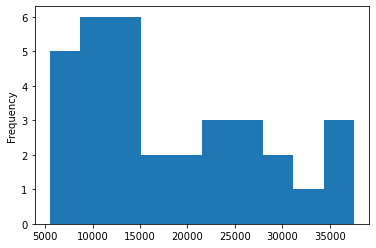

In [152]:
df8['pop_sq_mi'].plot(kind='hist')

Text(0, 0.5, 'Frequency')

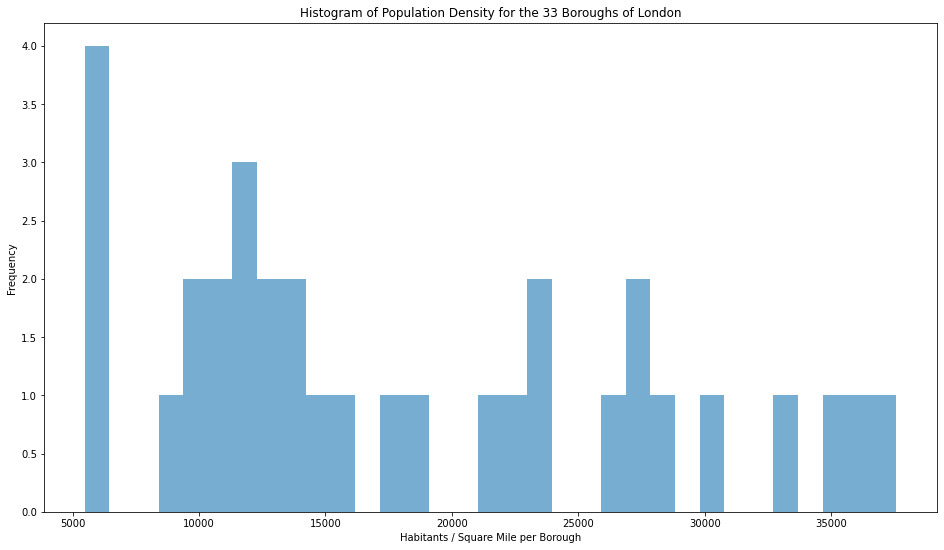

In [153]:
df8['pop_sq_mi'].plot(kind='hist', figsize=(16, 9), bins=33, alpha=0.6)
plt.title('Histogram of Population Density for the 33 Boroughs of London')
plt.xlabel('Habitants / Square Mile per Borough')
plt.ylabel('Frequency')

## Inner Habitants vs Outer Habbitants

In [154]:
df8[df8.Inner == 1]['pop_sq_mi']

5     27347.500000
9     14442.450766
10    34969.972826
11    28228.278041
17    37572.648084
18    33246.581197
20    30332.239382
21    21089.167281
26    26792.100539
28    35765.399738
30    23470.597128
31    27363.208685
32     6250.000000
Name: pop_sq_mi, dtype: float64

In [155]:
df8[df8.Inner == 0]['pop_sq_mi']

0     13952.045944
1     11020.842042
2     10123.481608
3     18997.844311
4      5483.853717
6     11156.899132
7     15974.533582
8     10098.424701
12    23063.572680
13    12487.018984
14     5584.313725
15     6420.550705
16    12142.850532
19    11598.956885
22    13996.074380
23    22763.018598
24    13235.629017
25     8631.709517
27    11572.002363
29    17731.621081
Name: pop_sq_mi, dtype: float64

In [156]:
df8['pop_sq_mi'];

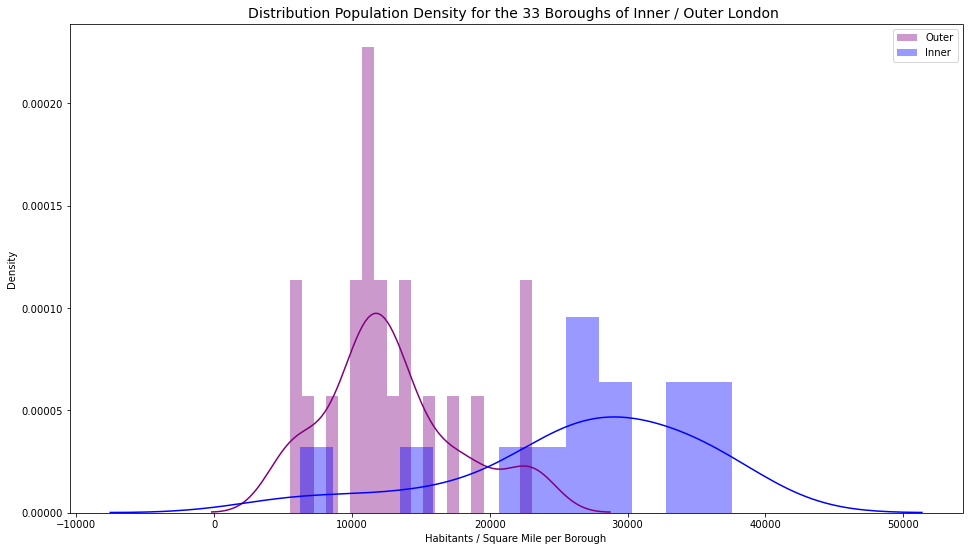

In [157]:
f, ax = plt.subplots(figsize=(16,9))
sns.distplot(df8[df8.Inner == 0]['pop_sq_mi'], bins=20, label='Outer', color='purple')
sns.distplot(df8[df8.Inner == 1]['pop_sq_mi'], bins=13, label='Inner', color='blue')
ax.set_title('Distribution Population Density for the 33 Boroughs of Inner / Outer London ', fontsize=14)
ax.set(xlabel='Habitants / Square Mile per Borough', ylabel='Density')
ax.legend()

# Map of London

In [158]:
address = 'City of London, London'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
print('The geograpical coordinates of City of London are {}, {}.'.format(latitude, longitude))

51.5156177 -0.0919983
The geograpical coordinates of City of London are 51.5156177, -0.0919983.


In [159]:
# create map of Greater London using latitude and longitude values
map_london_great = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df8['latitude'], df8['longitude'], df8['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_great)  
    
map_london_great

In [160]:
# create map of Greater London using latitude and longitude values
map_london_great2 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map2
for lat, lng, borough, pop_sq_mi in zip(df8['latitude'], df8['longitude'], df8['Borough'], df8['pop_sq_mi']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop_sq_mi/1000,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_great2)  
    
map_london_great2

### Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version¶

In [161]:
# The code was removed by Watson Studio for sharing.

## 1. First neighborhood in London dataframe.¶

In [162]:
df8.loc[0, 'Borough']

'Barking and Dagenham'

In [163]:
df8.head()

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown,pop_sq_mi
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,E,51.5607,1,0,0.1557,0,1,0,0,1,0,0,13952.045944
1,Barnet,0,Nothing,Conservative,33.49,369088.0,W,51.6252,0,1,-0.1517,0,1,0,1,0,0,0,11020.842042
2,Bexley,0,Nothing,Conservative,23.38,236687.0,E,51.4549,1,0,0.1505,0,1,0,1,0,0,0,10123.481608
3,Brent,0,Nothing,Labour,16.70,317264.0,W,51.5588,0,1,-0.2817,0,1,0,0,1,0,0,18997.844311
4,Bromley,0,Nothing,Conservative,57.97,317899.0,E,51.4039,1,0,0.0198,0,1,0,1,0,0,0,5483.853717


In [164]:
neighborhood_latitude = df8.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df8.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df8.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Barking and Dagenham are 51.5607, 0.1557.


In [165]:
radius = 500

In [166]:
# The code was removed by Watson Studio for sharing.

In [167]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb3e86371cf843322c2a3c6'},
 'response': {'headerLocation': 'Heath',
  'headerFullLocation': 'Heath, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 51.5652000045, 'lng': 0.162924882650929},
   'sw': {'lat': 51.556199995499995, 'lng': 0.148475117349071}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac518f8f964a520d6af20e3',
       'name': 'Central Park',
       'location': {'address': 'Wood Ln.',
        'crossStreet': 'Rainham Rd. N.',
        'lat': 51.559560186523925,
        'lng': 0.16198065419715413,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.559560186523925,
          'lng': 0.16198065419715413}],
        'distance': 452,
        'pos

In [168]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [169]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Central Park,Park,51.559560,0.161981
1,Crowlands Heath Golf Course,Golf Course,51.562457,0.155818
2,Robert Clack Leisure Centre,Martial Arts School,51.560808,0.152704
3,Morrisons,Supermarket,51.559774,0.148752
4,Beacontree Heath Leisure Centre,Gym / Fitness Center,51.560997,0.148932
5,Becontree Heath Bus Station,Bus Station,51.561065,0.150998
6,The Three Travellers,Pub,51.561089,0.150122
7,Dagenham Swimming Pool,Pool,51.560946,0.150054


In [170]:
nearby_venues;

In [171]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


### 2. Explore All Neighborhoods in London Dataframe.

In [172]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [173]:
lat

51.5155

In [174]:
names = df8.loc[:, 'Borough']

In [175]:
names[:10]

0    Barking and Dagenham
1                  Barnet
2                  Bexley
3                   Brent
4                 Bromley
5                  Camden
6                 Croydon
7                  Ealing
8                 Enfield
9               Greenwich
Name: Borough, dtype: object

In [176]:
latitudes = df8.loc[:, 'latitude'] # neighborhood latitude value

In [177]:
longitudes = df8.loc[:, 'longitude']

In [178]:
getNearbyVenues(names, latitudes, longitudes, radius=500)

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
City of London


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts School
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
...,...,...,...,...,...,...,...
1573,City of London,51.5155,-0.0922,The Nickel Bar,51.513613,-0.090161,Hotel Bar
1574,City of London,51.5155,-0.0922,Notes Coffee & Wine,51.519202,-0.089496,Coffee Shop
1575,City of London,51.5155,-0.0922,The Refinery Citypoint,51.519491,-0.089993,Building
1576,City of London,51.5155,-0.0922,Stone Gallery,51.513793,-0.098323,Scenic Lookout


In [179]:
nearby_venues[0:5]

,name,categories,lat,lng
0,Central Park,Park,51.559560,0.161981
1,Crowlands Heath Golf Course,Golf Course,51.562457,0.155818
2,Robert Clack Leisure Centre,Martial Arts School,51.560808,0.152704
3,Morrisons,Supermarket,51.559774,0.148752
4,Beacontree Heath Leisure Centre,Gym / Fitness Center,51.560997,0.148932


In [180]:
london_venues = getNearbyVenues(names, latitudes, longitudes, radius=500)

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
City of London


In [181]:
print(london_venues.shape)

(1578, 7)


In [182]:
london_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts School
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
5,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station
6,Barking and Dagenham,51.5607,0.1557,The Three Travellers,51.561089,0.150122,Pub
7,Barking and Dagenham,51.5607,0.1557,Dagenham Swimming Pool,51.560946,0.150054,Pool
8,Barnet,51.6252,-0.1517,The Atrium,51.624726,-0.151933,Café
9,Barnet,51.6252,-0.1517,Made Curtains,51.623485,-0.153565,Home Service


In [183]:
london_venues.tail(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1568,City of London,51.5155,-0.0922,Golden Gallery,51.513756,-0.098287,Scenic Lookout
1569,City of London,51.5155,-0.0922,Coco di Mama,51.514903,-0.098512,Italian Restaurant
1570,City of London,51.5155,-0.0922,Paternoster Square,51.514572,-0.099226,Plaza
1571,City of London,51.5155,-0.0922,Digme Fitness,51.518244,-0.090744,Cycle Studio
1572,City of London,51.5155,-0.0922,The Ivy Asia,51.513588,-0.096036,Asian Restaurant
1573,City of London,51.5155,-0.0922,The Nickel Bar,51.513613,-0.090161,Hotel Bar
1574,City of London,51.5155,-0.0922,Notes Coffee & Wine,51.519202,-0.089496,Coffee Shop
1575,City of London,51.5155,-0.0922,The Refinery Citypoint,51.519491,-0.089993,Building
1576,City of London,51.5155,-0.0922,Stone Gallery,51.513793,-0.098323,Scenic Lookout
1577,City of London,51.5155,-0.0922,The Arbitrager,51.514904,-0.086117,Pub


In [184]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barking and Dagenham,8,8,8,8,8,8
Barnet,5,5,5,5,5,5
Bexley,29,29,29,29,29,29
Brent,78,78,78,78,78,78
Bromley,40,40,40,40,40,40
Camden,79,79,79,79,79,79
City of London,100,100,100,100,100,100
Croydon,39,39,39,39,39,39
Ealing,75,75,75,75,75,75


In [185]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 230 uniques categories.


### 3. Analyze Neighborhoods London

In [186]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
london_onehot.shape

(1578, 231)

### Grouped rows by neighborhood and Mean of Frequency of Occurrence of each category

In [188]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()

In [189]:
london_grouped

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Barnet,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Bexley,0.000,0.000000,0.000000,0.000000,0.034483,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.00,0.000000,0.000000
3,Brent,0.000,0.000000,0.000000,0.000000,0.025641,0.000000,0.00,0.012821,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Bromley,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Camden,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.012658,0.000000,...,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,City of London,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.030000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.000000,0.030000,0.000000,0.00,0.000000,0.020000
7,Croydon,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Ealing,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.013333,0.000000,...,0.000000,0.000000,0.013333,0.026667,0.013333,0.013333,0.000000,0.00,0.000000,0.000000
9,Enfield,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.00,0.019608,0.000000


In [190]:
london_grouped.head(10)

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00
1,Barnet,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00
2,Bexley,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.034483,0.000000,0.034483,0.000000,0.0,0.0,0.000000,0.00
3,Brent,0.0,0.0,0.0,0.0,0.025641,0.0,0.0,0.012821,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00
4,Bromley,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00
5,Camden,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.012658,0.0,...,0.012658,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00
6,City of London,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.030000,0.0,...,0.000000,0.0,0.000000,0.020000,0.000000,0.030000,0.0,0.0,0.000000,0.02
7,Croydon,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00
8,Ealing,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.013333,0.0,...,0.000000,0.0,0.013333,0.026667,0.013333,0.013333,0.0,0.0,0.000000,0.00
9,Enfield,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.019608,0.000000,0.000000,0.000000,0.0,0.0,0.019608,0.00


In [191]:
london_grouped.shape

(33, 231)

In [192]:
london_grouped.columns.values

array(['Neighborhood', 'African Restaurant', 'Airport', 'Airport Lounge',
       'Airport Service', 'American Restaurant', 'Antique Shop',
       'Argentinian Restaurant', 'Art Gallery', 'Art Museum',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'Australian Restaurant', 'BBQ Joint', 'Bakery', 'Bank', 'Bar',
       'Bed & Breakfast', 'Beer Bar', 'Beer Garden', 'Beer Store',
       'Bistro', 'Boarding House', 'Bookstore', 'Botanical Garden',
       'Boutique', 'Boxing Gym', 'Brazilian Restaurant', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Buffet', 'Building', 'Burger Joint',
       'Burrito Place', 'Bus Station', 'Bus Stop', 'Butcher', 'Café',
       'Cajun / Creole Restaurant', 'Camera Store', 'Candy Store',
       'Cantonese Restaurant', 'Caribbean Restaurant', 'Casino',
       'Chaat Place', 'Champagne Bar', 'Chinese Restaurant',
       'Chocolate Shop', 'Church', 'Clothing Store', 'Cocktail Bar',
       'Coffee Shop', 'Concert Hall', 'C

#### Neighborhood with the top 5 most common venues¶

In [193]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                 venue  freq
0                 Park  0.12
1          Bus Station  0.12
2  Martial Arts School  0.12
3          Golf Course  0.12
4          Supermarket  0.12


----Barnet----
                venue  freq
0                Café   0.4
1            Bus Stop   0.2
2  Salon / Barbershop   0.2
3        Home Service   0.2
4  African Restaurant   0.0


----Bexley----
                    venue  freq
0          Clothing Store  0.14
1                     Pub  0.10
2             Coffee Shop  0.10
3  Furniture / Home Store  0.07
4             Supermarket  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.09
1                Hotel  0.09
2                  Bar  0.08
3       Clothing Store  0.06
4  Sporting Goods Shop  0.06


----Bromley----
                  venue  freq
0           Coffee Shop  0.12
1        Clothing Store  0.12
2  Gym / Fitness Center  0.05
3          Burger Joint  0.05
4           Pizza Place  0.05


----Camden---

#### Top Venues in Dataframe

##### Function to sort the venues in descending order

In [194]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### New Dataframe with Top 10 Venues for each Neighborhood

In [195]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pub,Gym / Fitness Center,Pool,Golf Course,Park,Bus Station,Supermarket,Martial Arts School,English Restaurant,Escape Room
1,Barnet,Café,Home Service,Bus Stop,Salon / Barbershop,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
2,Bexley,Clothing Store,Pub,Coffee Shop,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Italian Restaurant
3,Brent,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Italian Restaurant,Restaurant,Indian Restaurant
4,Bromley,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Gelato Shop,Chocolate Shop,Sushi Restaurant


In [196]:
neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pub,Gym / Fitness Center,Pool,Golf Course,Park,Bus Station,Supermarket,Martial Arts School,English Restaurant,Escape Room
1,Barnet,Café,Home Service,Bus Stop,Salon / Barbershop,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
2,Bexley,Clothing Store,Pub,Coffee Shop,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Italian Restaurant
3,Brent,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Italian Restaurant,Restaurant,Indian Restaurant
4,Bromley,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Gelato Shop,Chocolate Shop,Sushi Restaurant
5,Camden,Coffee Shop,Hotel,Café,Pub,Burger Joint,Italian Restaurant,Modern European Restaurant,Deli / Bodega,Sandwich Place,Restaurant
6,City of London,Coffee Shop,Gym / Fitness Center,Italian Restaurant,French Restaurant,Scenic Lookout,Restaurant,Hotel,Steakhouse,Seafood Restaurant,Clothing Store
7,Croydon,Pub,Coffee Shop,Portuguese Restaurant,Italian Restaurant,Asian Restaurant,Breakfast Spot,Spanish Restaurant,Burger Joint,Burrito Place,Café
8,Ealing,Coffee Shop,Clothing Store,Park,Pub,Italian Restaurant,Bakery,Burger Joint,Bus Stop,Café,Bar
9,Enfield,Clothing Store,Coffee Shop,Café,Pub,Supermarket,Department Store,Pharmacy,Shopping Mall,Gift Shop,Optical Shop


In [197]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pub,Gym / Fitness Center,Pool,Golf Course,Park,Bus Station,Supermarket,Martial Arts School,English Restaurant,Escape Room
1,Barnet,Café,Home Service,Bus Stop,Salon / Barbershop,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
2,Bexley,Clothing Store,Pub,Coffee Shop,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Italian Restaurant
3,Brent,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Italian Restaurant,Restaurant,Indian Restaurant
4,Bromley,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Gelato Shop,Chocolate Shop,Sushi Restaurant
5,Camden,Coffee Shop,Hotel,Café,Pub,Burger Joint,Italian Restaurant,Modern European Restaurant,Deli / Bodega,Sandwich Place,Restaurant
6,City of London,Coffee Shop,Gym / Fitness Center,Italian Restaurant,French Restaurant,Scenic Lookout,Restaurant,Hotel,Steakhouse,Seafood Restaurant,Clothing Store
7,Croydon,Pub,Coffee Shop,Portuguese Restaurant,Italian Restaurant,Asian Restaurant,Breakfast Spot,Spanish Restaurant,Burger Joint,Burrito Place,Café
8,Ealing,Coffee Shop,Clothing Store,Park,Pub,Italian Restaurant,Bakery,Burger Joint,Bus Stop,Café,Bar
9,Enfield,Clothing Store,Coffee Shop,Café,Pub,Supermarket,Department Store,Pharmacy,Shopping Mall,Gift Shop,Optical Shop


In [198]:
london_grouped.head(3)

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.0,...,0.0,0.0,0.034483,0.0,0.034483,0.0,0.0,0.0,0.0,0.0


In [199]:
df8.head()

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown,pop_sq_mi
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,E,51.5607,1,0,0.1557,0,1,0,0,1,0,0,13952.045944
1,Barnet,0,Nothing,Conservative,33.49,369088.0,W,51.6252,0,1,-0.1517,0,1,0,1,0,0,0,11020.842042
2,Bexley,0,Nothing,Conservative,23.38,236687.0,E,51.4549,1,0,0.1505,0,1,0,1,0,0,0,10123.481608
3,Brent,0,Nothing,Labour,16.70,317264.0,W,51.5588,0,1,-0.2817,0,1,0,0,1,0,0,18997.844311
4,Bromley,0,Nothing,Conservative,57.97,317899.0,E,51.4039,1,0,0.0198,0,1,0,1,0,0,0,5483.853717


In [200]:
df8.columns

Index(['Borough', 'Inner', 'Status', 'pc', 'Area_sq_mi', 'Population',
       'ew_long', 'latitude', 'E', 'W', 'longitude', 'status_City',
       'status_Nothing', 'status_Royal', 'pc_Conservative', 'pc_Labour',
       'pc_Liberal_Democrat', 'pc_Unknown', 'pop_sq_mi'],
      dtype='object')

In [201]:
df8_ci = df8.drop(['Inner', 'Status', 'pc', 'Area_sq_mi', 'Population',
       'ew_long', 'latitude', 'E', 'W', 'longitude', 'pop_sq_mi'], axis=1)

In [202]:
df8_ci.head(3)

,Borough,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown
0,Barking and Dagenham,0,1,0,0,1,0,0
1,Barnet,0,1,0,1,0,0,0
2,Bexley,0,1,0,1,0,0,0


### 4. Cluster Neighborhoods

##### k-means to cluster the neighborhood into clusters.

In [203]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [204]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [205]:
kmeans.labels_

array([4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

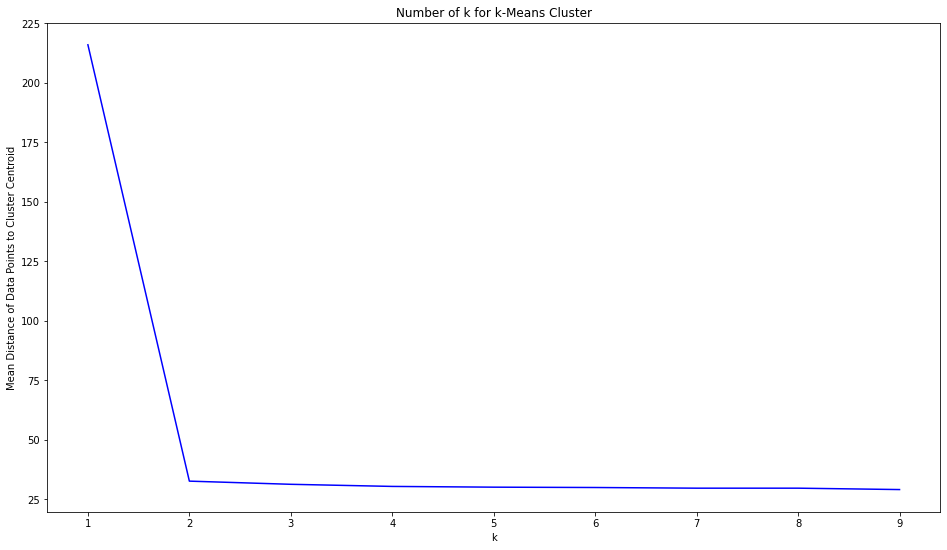

In [206]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(london_grouped_clustering)
    distortions.append(sum(np.min(cdist(london_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / london_grouped_clustering.shape[0])

#source idea: https://github.com/Srcanyildiz/istanbul/blob/master/Istanbul.ipynb

# Plot the elbow
plt.figure(figsize=(16, 9))
plt.plot(K, distortions, 'b-')
plt.xlabel('k')
plt.ylabel('Mean Distance of Data Points to Cluster Centroid')
plt.title('Number of k for k-Means Cluster')
plt.show()

In [207]:
# set number of clusters
kclusters = 2

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [208]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [209]:
london_grouped.head(3)

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.0,...,0.0,0.0,0.034483,0.0,0.034483,0.0,0.0,0.0,0.0,0.0


In [210]:
df8_ci.head(3)

,Borough,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown
0,Barking and Dagenham,0,1,0,0,1,0,0
1,Barnet,0,1,0,1,0,0,0
2,Bexley,0,1,0,1,0,0,0


In [211]:
london_grouped2=london_grouped.merge(df8_ci, left_on='Neighborhood', right_on='Borough')

In [212]:
london_grouped2.head()

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Women's Store,Yoga Studio,Borough,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,Barking and Dagenham,0,1,0,0,1,0,0
1,Barnet,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,Barnet,0,1,0,1,0,0,0
2,Bexley,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.000000,0.0,...,0.0,0.0,Bexley,0,1,0,1,0,0,0
3,Brent,0.0,0.0,0.0,0.0,0.025641,0.0,0.0,0.012821,0.0,...,0.0,0.0,Brent,0,1,0,0,1,0,0
4,Bromley,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,Bromley,0,1,0,1,0,0,0


In [213]:
london_grouped2.tail()

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Women's Store,Yoga Studio,Borough,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown
28,Sutton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,Sutton,0,1,0,0,0,1,0
29,Tower Hamlets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,Tower Hamlets,0,1,0,0,1,0,0
30,Waltham Forest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,...,0.0,0.0,Waltham Forest,0,1,0,0,1,0,0
31,Wandsworth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,Wandsworth,0,1,0,1,0,0,0
32,Westminster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013514,0.0,...,0.0,0.0,Westminster,1,0,0,1,0,0,0


In [214]:
london_grouped_clustering2=london_grouped2.drop(['Neighborhood', 'Borough'], axis=1)

In [215]:
london_grouped_clustering2.head()

,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Winery,Women's Store,Yoga Studio,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,1,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,1,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.025641,0.0,0.0,0.012821,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0,1,0,1,0,0,0


In [216]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering2)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10] 

array([0, 2, 2, 0, 2, 0, 3, 0, 0, 0], dtype=int32)

In [217]:
kmeans2.labels_

array([0, 2, 2, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 4, 0, 4, 0, 0, 2, 3], dtype=int32)

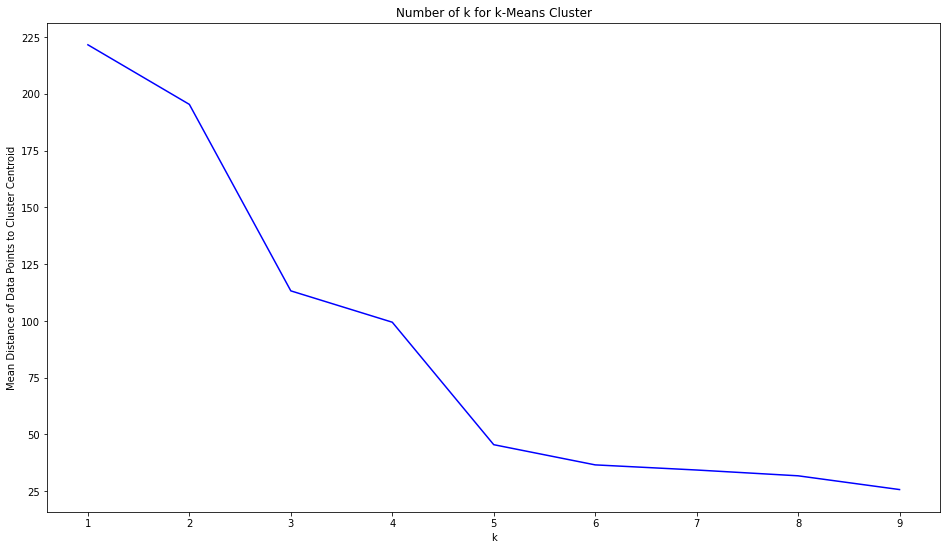

In [218]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(london_grouped_clustering2)
    distortions.append(sum(np.min(cdist(london_grouped_clustering2, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / london_grouped_clustering2.shape[0])

# source idea: https://github.com/Srcanyildiz/istanbul/blob/master/Istanbul.ipynb

# Plot the elbow
plt.figure(figsize=(16, 9))
plt.plot(K, distortions, 'b-')
plt.xlabel('k')
plt.ylabel('Mean Distance of Data Points to Cluster Centroid')
plt.title('Number of k for k-Means Cluster')
plt.show()

In [219]:
london_data = df8

In [220]:
london_data.head()

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown,pop_sq_mi
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,E,51.5607,1,0,0.1557,0,1,0,0,1,0,0,13952.045944
1,Barnet,0,Nothing,Conservative,33.49,369088.0,W,51.6252,0,1,-0.1517,0,1,0,1,0,0,0,11020.842042
2,Bexley,0,Nothing,Conservative,23.38,236687.0,E,51.4549,1,0,0.1505,0,1,0,1,0,0,0,10123.481608
3,Brent,0,Nothing,Labour,16.70,317264.0,W,51.5588,0,1,-0.2817,0,1,0,0,1,0,0,18997.844311
4,Bromley,0,Nothing,Conservative,57.97,317899.0,E,51.4039,1,0,0.0198,0,1,0,1,0,0,0,5483.853717


In [221]:
neighborhoods_venues_sorted.head();

In [222]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans2.labels_)

In [223]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Barking and Dagenham,Pub,Gym / Fitness Center,Pool,Golf Course,Park,Bus Station,Supermarket,Martial Arts School,English Restaurant,Escape Room
1,2,Barnet,Café,Home Service,Bus Stop,Salon / Barbershop,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
2,2,Bexley,Clothing Store,Pub,Coffee Shop,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Italian Restaurant
3,0,Brent,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Italian Restaurant,Restaurant,Indian Restaurant
4,2,Bromley,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Gelato Shop,Chocolate Shop,Sushi Restaurant


In [224]:
neighborhoods_venues_sorted.tail()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,4,Sutton,Café,Clothing Store,Coffee Shop,Pub,Department Store,Italian Restaurant,Sandwich Place,Video Game Store,Bar,Pizza Place
29,0,Tower Hamlets,Coffee Shop,Italian Restaurant,Sandwich Place,Hotel,Bus Station,Asian Restaurant,Chinese Restaurant,Outdoor Sculpture,Gym / Fitness Center,Grocery Store
30,0,Waltham Forest,Pub,Vegetarian / Vegan Restaurant,Tea Room,Bar,Trail,Gym / Fitness Center,Art Gallery,Beer Store,Coffee Shop,Concert Hall
31,2,Wandsworth,Pub,Coffee Shop,Clothing Store,Breakfast Spot,Burger Joint,Café,Supermarket,Asian Restaurant,Indian Restaurant,Gym / Fitness Center
32,3,Westminster,Hotel,Sandwich Place,Coffee Shop,Theater,Gym / Fitness Center,Italian Restaurant,Sushi Restaurant,Pub,Sporting Goods Shop,Hotel Bar


In [225]:
london_data['Neighborhood'] = london_data['Borough']

In [226]:
london_data.tail()

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown,pop_sq_mi,Neighborhood
28,Tower Hamlets,1,Nothing,Labour,7.63,272890.0,W,51.5099,0,1,-0.0059,0,1,0,0,1,0,0,35765.399738,Tower Hamlets
29,Waltham Forest,0,Nothing,Labour,14.99,265797.0,W,51.5908,0,1,-0.0134,0,1,0,0,1,0,0,17731.621081,Waltham Forest
30,Wandsworth,1,Nothing,Conservative,13.23,310516.0,W,51.4567,0,1,-0.1910,0,1,0,1,0,0,0,23470.597128,Wandsworth
31,Westminster,1,City,Conservative,8.29,226841.0,W,51.4973,0,1,-0.1372,1,0,0,1,0,0,0,27363.208685,Westminster
32,City of London,1,City,Unknown,1.12,7000.0,W,51.5155,0,1,-0.0922,1,0,0,0,0,0,1,6250.000000,City of London


In [227]:
london_merged = london_data


# merge london_grouped2 with london_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

london_merged.head() # check the last columns!

,Borough,Inner,Status,pc,Area_sq_mi,Population,ew_long,latitude,E,W,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,0,Nothing,Labour,13.93,194352.0,E,51.5607,1,0,...,Pub,Gym / Fitness Center,Pool,Golf Course,Park,Bus Station,Supermarket,Martial Arts School,English Restaurant,Escape Room
1,Barnet,0,Nothing,Conservative,33.49,369088.0,W,51.6252,0,1,...,Café,Home Service,Bus Stop,Salon / Barbershop,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
2,Bexley,0,Nothing,Conservative,23.38,236687.0,E,51.4549,1,0,...,Clothing Store,Pub,Coffee Shop,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Italian Restaurant
3,Brent,0,Nothing,Labour,16.70,317264.0,W,51.5588,0,1,...,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Italian Restaurant,Restaurant,Indian Restaurant
4,Bromley,0,Nothing,Conservative,57.97,317899.0,E,51.4039,1,0,...,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Gelato Shop,Chocolate Shop,Sushi Restaurant


In [228]:
london_merged.columns

Index(['Borough', 'Inner', 'Status', 'pc', 'Area_sq_mi', 'Population',
       'ew_long', 'latitude', 'E', 'W', 'longitude', 'status_City',
       'status_Nothing', 'status_Royal', 'pc_Conservative', 'pc_Labour',
       'pc_Liberal_Democrat', 'pc_Unknown', 'pop_sq_mi', 'Neighborhood',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [229]:
london_merged[['Neighborhood',
       'Cluster Labels', 'Inner', 'Status', 'pc', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']]

,Neighborhood,Cluster Labels,Inner,Status,pc,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,0,0,Nothing,Labour,Pub,Gym / Fitness Center,Pool,Golf Course,Park,Bus Station,Supermarket,Martial Arts School,English Restaurant,Escape Room
1,Barnet,2,0,Nothing,Conservative,Café,Home Service,Bus Stop,Salon / Barbershop,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
2,Bexley,2,0,Nothing,Conservative,Clothing Store,Pub,Coffee Shop,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Italian Restaurant
3,Brent,0,0,Nothing,Labour,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Italian Restaurant,Restaurant,Indian Restaurant
4,Bromley,2,0,Nothing,Conservative,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Gelato Shop,Chocolate Shop,Sushi Restaurant
5,Camden,0,1,Nothing,Labour,Coffee Shop,Hotel,Café,Pub,Burger Joint,Italian Restaurant,Modern European Restaurant,Deli / Bodega,Sandwich Place,Restaurant
6,Croydon,0,0,Nothing,Labour,Pub,Coffee Shop,Portuguese Restaurant,Italian Restaurant,Asian Restaurant,Breakfast Spot,Spanish Restaurant,Burger Joint,Burrito Place,Café
7,Ealing,0,0,Nothing,Labour,Coffee Shop,Clothing Store,Park,Pub,Italian Restaurant,Bakery,Burger Joint,Bus Stop,Café,Bar
8,Enfield,0,0,Nothing,Labour,Clothing Store,Coffee Shop,Café,Pub,Supermarket,Department Store,Pharmacy,Shopping Mall,Gift Shop,Optical Shop
9,Greenwich,1,1,Royal,Labour,Pub,Clothing Store,Fast Food Restaurant,Coffee Shop,Hotel,Grocery Store,Pharmacy,Supermarket,Plaza,African Restaurant


In [230]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [231]:
kclusters

5

In [232]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['latitude'], london_merged['longitude'], london_merged['Neighborhood'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [233]:
rainbow

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

# 5. Examine Clusters¶

##### Cluster 1

In [234]:
Cluster_1 = london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

In [235]:
Cluster_1.columns

Index(['Inner', 'Population', 'ew_long', 'latitude', 'E', 'W', 'longitude',
       'status_City', 'status_Nothing', 'status_Royal', 'pc_Conservative',
       'pc_Labour', 'pc_Liberal_Democrat', 'pc_Unknown', 'pop_sq_mi',
       'Neighborhood', 'Cluster Labels', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')

In [236]:
Cluster_1.shape

(20, 27)

In [237]:
Cluster_1

,Inner,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,194352.0,E,51.5607,1,0,0.1557,0,1,0,...,Pub,Gym / Fitness Center,Pool,Golf Course,Park,Bus Station,Supermarket,Martial Arts School,English Restaurant,Escape Room
3,0,317264.0,W,51.5588,0,1,-0.2817,0,1,0,...,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Italian Restaurant,Restaurant,Indian Restaurant
5,1,229719.0,W,51.5290,0,1,-0.1255,0,1,0,...,Coffee Shop,Hotel,Café,Pub,Burger Joint,Italian Restaurant,Modern European Restaurant,Deli / Bodega,Sandwich Place,Restaurant
6,0,372752.0,W,51.3714,0,1,-0.0977,0,1,0,...,Pub,Coffee Shop,Portuguese Restaurant,Italian Restaurant,Asian Restaurant,Breakfast Spot,Spanish Restaurant,Burger Joint,Burrito Place,Café
7,0,342494.0,W,51.5130,0,1,-0.3089,0,1,0,...,Coffee Shop,Clothing Store,Park,Pub,Italian Restaurant,Bakery,Burger Joint,Bus Stop,Café,Bar
8,0,320524.0,W,51.6538,0,1,-0.0799,0,1,0,...,Clothing Store,Coffee Shop,Café,Pub,Supermarket,Department Store,Pharmacy,Shopping Mall,Gift Shop,Optical Shop
10,1,257379.0,W,51.5450,0,1,-0.0553,0,1,0,...,Pub,Coffee Shop,Bakery,Café,Cocktail Bar,Organic Grocery,Brewery,Clothing Store,Park,Modern European Restaurant
11,1,178685.0,W,51.4927,0,1,-0.2339,0,1,0,...,Pub,Café,Indian Restaurant,Coffee Shop,Italian Restaurant,Grocery Store,Hotel,Gastropub,Clothing Store,Vietnamese Restaurant
12,0,263386.0,W,51.6000,0,1,-0.1119,0,1,0,...,Park,Café,Bar,Indian Restaurant,Bakery,Hotel Bar,Italian Restaurant,Gym / Fitness Center,Grocery Store,Mediterranean Restaurant
13,0,243372.0,W,51.5898,0,1,-0.3346,0,1,0,...,Indian Restaurant,Coffee Shop,Grocery Store,Supermarket,Platform,Thai Restaurant,Indie Movie Theater,Fish & Chips Shop,Fish Market,Film Studio


In [238]:
Cluster_1.columns

Index(['Inner', 'Population', 'ew_long', 'latitude', 'E', 'W', 'longitude',
       'status_City', 'status_Nothing', 'status_Royal', 'pc_Conservative',
       'pc_Labour', 'pc_Liberal_Democrat', 'pc_Unknown', 'pop_sq_mi',
       'Neighborhood', 'Cluster Labels', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')

In [239]:
Cluster_1[['Cluster Labels', 'Neighborhood', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue']]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,0,Barking and Dagenham,Pub,Gym / Fitness Center,Pool,Golf Course,Park,Bus Station,Supermarket,Martial Arts School,English Restaurant
3,0,Brent,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Italian Restaurant,Restaurant
5,0,Camden,Coffee Shop,Hotel,Café,Pub,Burger Joint,Italian Restaurant,Modern European Restaurant,Deli / Bodega,Sandwich Place
6,0,Croydon,Pub,Coffee Shop,Portuguese Restaurant,Italian Restaurant,Asian Restaurant,Breakfast Spot,Spanish Restaurant,Burger Joint,Burrito Place
7,0,Ealing,Coffee Shop,Clothing Store,Park,Pub,Italian Restaurant,Bakery,Burger Joint,Bus Stop,Café
8,0,Enfield,Clothing Store,Coffee Shop,Café,Pub,Supermarket,Department Store,Pharmacy,Shopping Mall,Gift Shop
10,0,Hackney,Pub,Coffee Shop,Bakery,Café,Cocktail Bar,Organic Grocery,Brewery,Clothing Store,Park
11,0,Hammersmith and Fulham,Pub,Café,Indian Restaurant,Coffee Shop,Italian Restaurant,Grocery Store,Hotel,Gastropub,Clothing Store
12,0,Haringey,Park,Café,Bar,Indian Restaurant,Bakery,Hotel Bar,Italian Restaurant,Gym / Fitness Center,Grocery Store
13,0,Harrow,Indian Restaurant,Coffee Shop,Grocery Store,Supermarket,Platform,Thai Restaurant,Indie Movie Theater,Fish & Chips Shop,Fish Market


In [240]:
Cluster_1['1st Most Common Venue'].value_counts()

Pub                     6
Coffee Shop             5
Supermarket             2
Hotel                   1
Clothing Store          1
Caribbean Restaurant    1
Pizza Place             1
Indian Restaurant       1
Café                    1
Park                    1
Name: 1st Most Common Venue, dtype: int64

In [241]:
Cluster_1['2nd Most Common Venue'].value_counts()

Coffee Shop                      4
Café                             3
Hotel                            2
Pub                              1
Supermarket                      1
Gym / Fitness Center             1
Cocktail Bar                     1
Vegetarian / Vegan Restaurant    1
Mediterranean Restaurant         1
Clothing Store                   1
Chinese Restaurant               1
Italian Restaurant               1
Grocery Store                    1
Fast Food Restaurant             1
Name: 2nd Most Common Venue, dtype: int64

In [242]:
Cluster_1['3rd Most Common Venue'].value_counts()

Bar                      3
Italian Restaurant       2
Café                     2
Park                     2
Pub                      1
Bakery                   1
Cocktail Bar             1
Indian Restaurant        1
Portuguese Restaurant    1
Sandwich Place           1
Pool                     1
Clothing Store           1
Tea Room                 1
Rafting                  1
Grocery Store            1
Name: 3rd Most Common Venue, dtype: int64

##### Cluster 2

In [243]:
Cluster_2 = london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

In [244]:
Cluster_2

,Inner,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,1,264008.0,E,51.4892,1,0,0.0648,0,0,1,...,Pub,Clothing Store,Fast Food Restaurant,Coffee Shop,Hotel,Grocery Store,Pharmacy,Supermarket,Plaza,African Restaurant
18,1,155594.0,W,51.5020,0,1,-0.1947,0,0,1,...,Café,Juice Bar,Restaurant,Clothing Store,Art Gallery,Burger Joint,Italian Restaurant,Bakery,French Restaurant,Gym / Fitness Center
19,0,166793.0,W,51.4085,0,1,-0.3064,0,0,1,...,Coffee Shop,Café,Clothing Store,Italian Restaurant,Pub,Department Store,Burger Joint,Sushi Restaurant,Bakery,Hotel


In [245]:
Cluster_2.shape

(3, 27)

In [246]:
Cluster_2[['Cluster Labels', 'Neighborhood', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue']]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
9,1,Greenwich,Pub,Clothing Store,Fast Food Restaurant,Coffee Shop,Hotel,Grocery Store,Pharmacy,Supermarket,Plaza
18,1,Kensington and Chelsea,Café,Juice Bar,Restaurant,Clothing Store,Art Gallery,Burger Joint,Italian Restaurant,Bakery,French Restaurant
19,1,Kingston upon Thames,Coffee Shop,Café,Clothing Store,Italian Restaurant,Pub,Department Store,Burger Joint,Sushi Restaurant,Bakery


##### Cluster 3

In [247]:
Cluster_3 = london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

In [248]:
Cluster_3

,Inner,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,0,369088.0,W,51.6252,0,1,-0.1517,0,1,0,...,Café,Home Service,Bus Stop,Salon / Barbershop,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
2,0,236687.0,E,51.4549,1,0,0.1505,0,1,0,...,Clothing Store,Pub,Coffee Shop,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Italian Restaurant
4,0,317899.0,E,51.4039,1,0,0.0198,0,1,0,...,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Gelato Shop,Chocolate Shop,Sushi Restaurant
14,0,242080.0,E,51.5812,1,0,0.1837,0,1,0,...,Coffee Shop,Clothing Store,Shopping Mall,Hotel,Department Store,Café,Bakery,Fast Food Restaurant,Pub,Bookstore
15,0,286806.0,W,51.5441,0,1,-0.4760,0,1,0,...,Coffee Shop,Clothing Store,Pharmacy,Fast Food Restaurant,Italian Restaurant,Department Store,Burger Joint,Pub,Bookstore,Toy / Game Store
30,1,310516.0,W,51.4567,0,1,-0.1910,0,1,0,...,Pub,Coffee Shop,Clothing Store,Breakfast Spot,Burger Joint,Café,Supermarket,Asian Restaurant,Indian Restaurant,Gym / Fitness Center


In [249]:
Cluster_3.shape

(6, 27)

In [250]:
Cluster_3[['Cluster Labels', 'Neighborhood', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue']]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
1,2,Barnet,Café,Home Service,Bus Stop,Salon / Barbershop,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop
2,2,Bexley,Clothing Store,Pub,Coffee Shop,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery
4,2,Bromley,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Gelato Shop,Chocolate Shop
14,2,Havering,Coffee Shop,Clothing Store,Shopping Mall,Hotel,Department Store,Café,Bakery,Fast Food Restaurant,Pub
15,2,Hillingdon,Coffee Shop,Clothing Store,Pharmacy,Fast Food Restaurant,Italian Restaurant,Department Store,Burger Joint,Pub,Bookstore
30,2,Wandsworth,Pub,Coffee Shop,Clothing Store,Breakfast Spot,Burger Joint,Café,Supermarket,Asian Restaurant,Indian Restaurant


In [251]:
Cluster_3[['Cluster Labels', 'Neighborhood', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue', 'pop_sq_mi']].sort_values('pop_sq_mi', ascending=False)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,pop_sq_mi
30,2,Wandsworth,Pub,Coffee Shop,Clothing Store,23470.597128
1,2,Barnet,Café,Home Service,Bus Stop,11020.842042
2,2,Bexley,Clothing Store,Pub,Coffee Shop,10123.481608
15,2,Hillingdon,Coffee Shop,Clothing Store,Pharmacy,6420.550705
14,2,Havering,Coffee Shop,Clothing Store,Shopping Mall,5584.313725
4,2,Bromley,Coffee Shop,Clothing Store,Bar,5483.853717


##### Cluster 4

In [252]:
Cluster_4 = london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

In [253]:
Cluster_4

,Inner,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,1,226841.0,W,51.4973,0,1,-0.1372,1,0,0,...,Hotel,Sandwich Place,Coffee Shop,Theater,Gym / Fitness Center,Italian Restaurant,Sushi Restaurant,Pub,Sporting Goods Shop,Hotel Bar
32,1,7000.0,W,51.5155,0,1,-0.0922,1,0,0,...,Coffee Shop,Gym / Fitness Center,Italian Restaurant,French Restaurant,Scenic Lookout,Restaurant,Hotel,Steakhouse,Seafood Restaurant,Clothing Store


In [254]:
Cluster_4.shape

(2, 27)

In [255]:
Cluster_4[['Cluster Labels', 'Neighborhood', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue']]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
31,3,Westminster,Hotel,Sandwich Place,Coffee Shop,Theater,Gym / Fitness Center,Italian Restaurant,Sushi Restaurant,Pub,Sporting Goods Shop
32,3,City of London,Coffee Shop,Gym / Fitness Center,Italian Restaurant,French Restaurant,Scenic Lookout,Restaurant,Hotel,Steakhouse,Seafood Restaurant


##### Cluster 5

In [256]:
Cluster_5 = london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

In [257]:
Cluster_5

,Inner,Population,ew_long,latitude,E,W,longitude,status_City,status_Nothing,status_Royal,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,0,191365.0,W,51.4479,0,1,-0.3260,0,1,0,...,Pub,Coffee Shop,Italian Restaurant,Bus Stop,Steakhouse,Grocery Store,Pharmacy,Indian Restaurant,Platform,Supermarket
27,0,195914.0,W,51.3618,0,1,-0.1945,0,1,0,...,Café,Clothing Store,Coffee Shop,Pub,Department Store,Italian Restaurant,Sandwich Place,Video Game Store,Bar,Pizza Place


In [258]:
Cluster_5.shape

(2, 27)

In [259]:
Cluster_5[['Cluster Labels', 'Neighborhood', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue']]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
25,4,Richmond upon Thames,Pub,Coffee Shop,Italian Restaurant,Bus Stop,Steakhouse,Grocery Store,Pharmacy,Indian Restaurant,Platform
27,4,Sutton,Café,Clothing Store,Coffee Shop,Pub,Department Store,Italian Restaurant,Sandwich Place,Video Game Store,Bar


##### Aggregated Clusters

In [260]:
london_merged.dtypes

Borough                    object
Inner                       int64
Status                     object
pc                         object
Area_sq_mi                float64
Population                float64
ew_long                    object
latitude                  float64
E                           uint8
W                           uint8
longitude                 float64
status_City                 uint8
status_Nothing              uint8
status_Royal                uint8
pc_Conservative             uint8
pc_Labour                   uint8
pc_Liberal_Democrat         uint8
pc_Unknown                  uint8
pop_sq_mi                 float64
Neighborhood               object
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Commo

In [261]:
london_merged.columns

Index(['Borough', 'Inner', 'Status', 'pc', 'Area_sq_mi', 'Population',
       'ew_long', 'latitude', 'E', 'W', 'longitude', 'status_City',
       'status_Nothing', 'status_Royal', 'pc_Conservative', 'pc_Labour',
       'pc_Liberal_Democrat', 'pc_Unknown', 'pop_sq_mi', 'Neighborhood',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [262]:
agg_clusters = london_merged.groupby('Cluster Labels')['Inner', 'status_City',
       'status_Nothing', 'status_Royal', 'pc_Conservative', 'pc_Labour',
       'pc_Liberal_Democrat', 'pc_Unknown', 'pop_sq_mi', 'Area_sq_mi', 'Population'].mean()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


In [263]:
agg_clusters

,Inner,status_City,status_Nothing,status_Royal,pc_Conservative,pc_Labour,pc_Liberal_Democrat,pc_Unknown,pop_sq_mi,Area_sq_mi,Population
Cluster Labels,,,,,,,,,,,
0,0.400000,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,21384.841942,15.277000,272264.8
1,0.666667,0.0,0.0,1.0,0.333333,0.333333,0.333333,0.0,19762.662949,12.446667,195465.0
2,0.166667,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.0,10350.606488,36.015000,293846.0
3,1.000000,1.0,0.0,0.0,0.500000,0.000000,0.000000,0.5,16806.604343,4.705000,116920.5
4,0.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.0,10101.855940,19.550000,193639.5


### Interpretation Clusters

* Cluster 1: Labour, No Status
* Cluster 2: Royal Status, No Political Color
* Cluster 3: Conservative, No Status
* Cluster 4: Inner, City Status, Slightly Conservative
* Cluster 5: Liberal_democrats, No Status

In [264]:
count_clusters = london_merged.groupby('Cluster Labels')['Borough'].count()

In [265]:
print(count_clusters)

Cluster Labels
0    20
1     3
2     6
3     2
4     2
Name: Borough, dtype: int64
